In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
sns.set_context("talk")

In [26]:
df = pd.read_csv("../results/tclr_model_testing/all/misc_results/mss_trial.csv")


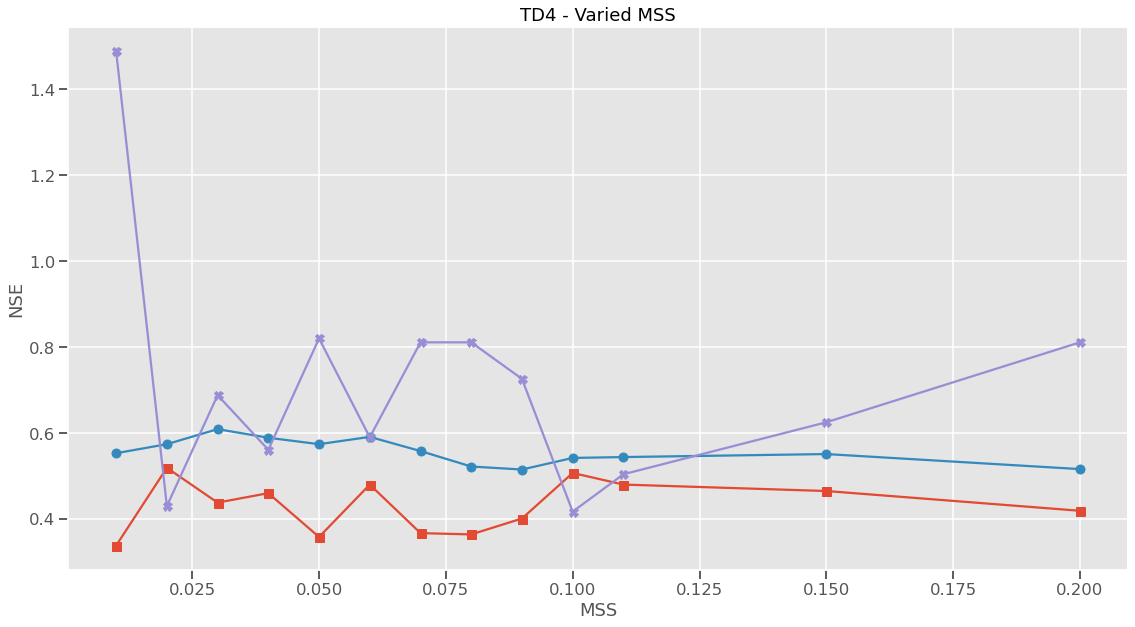

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(19, 10))
ax.plot(df.MSS, df.Mean, label='Mean', marker="s")
ax.plot(df.MSS, df.Median, label='Median', marker="o")
ax.plot(df.MSS, df.StD, label='StD', marker="X")
ax.set_ylabel("NSE")
ax.set_xlabel("MSS")
ax.set_title("TD4 - Varied MSS")
plt.savefig("./figures/mss_line_plot.png", dpi=300)
plt.show()

In [28]:
rank = df.set_index("MSS")
rank[["Mean", "Median"]] = rank[["Mean", "Median"]].rank(ascending=False)
rank["StD"] = rank["StD"].rank(ascending=True)
rank["Score"] = rank.sum(axis=1)

In [29]:
rank

,Mean,Median,StD,Score
MSS,,,,
0.01,13.0,7.0,13.0,33.0
0.02,1.0,4.5,2.0,7.5
0.03,7.0,1.0,7.0,15.0
0.04,6.0,3.0,4.0,13.0
0.05,12.0,4.5,12.0,28.5
0.06,3.5,2.0,5.0,10.5
0.07,10.0,6.0,10.0,26.0
0.08,11.0,11.0,10.0,32.0
0.09,9.0,13.0,8.0,30.0
